# &laquo;Машинное обучение&raquo;, AI Masters

**Семинаристы**: Илья Карчмит, Александр Краснов, Арсений Зинкевич

---

### Семинар 2: Библиотеки для анализа данных. Pandas, Matplotlib, Seaborn.

In [1]:
import numpy as np
import pandas as pd

In [2]:
print(np.__name__, np.__version__)
print(pd.__name__, pd.__version__)

numpy 2.3.3
pandas 2.3.3


# Pandas

**Pandas** &mdash; одна из самых больших и популярных библиотек для работы с табличными данными.

Pandas не единственная и не самая "энергоэффективная" библиотека. Например, есть Polars, Spark (для бигдаты), метабиблиотека Narwhals и много еще чего...

Одно из самых больших преимуществ Pandas &mdash; это его популярность. Благодаря этому в Pandas есть:
* Очень детализированная и понятная документация,
* Огромное количество обучающих материалов (бесплатных! но и платных, конечно, тоже...)
* Большое коммьюнити: по сложным вопросам можно писать на форумы и в чаты

Official must-read:
* User guide: https://pandas.pydata.org/docs/user_guide/index.html
* API reference: https://pandas.pydata.org/docs/reference/index.html

## pd.DataFrame

![file_operations.png](https://data.bioml.ru/htdocs/courses/python/datasci/pandas/img/file_operations.png)

In [3]:
!wget https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/titanic_train.csv -O titanic_train.csv

--2025-10-10 11:17:39--  https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/titanic_train.csv
Resolving data.bioml.ru (data.bioml.ru)... 188.120.231.217
Connecting to data.bioml.ru (data.bioml.ru)|188.120.231.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/csv]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  59.76K  --.-KB/s    in 0.07s   

2025-10-10 11:17:40 (859 KB/s) - ‘titanic_train.csv’ saved [61194/61194]



In [4]:
df = pd.read_csv('titanic_train.csv')
# df.read_parquet(...)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


![dataframe1](https://data.bioml.ru/htdocs/courses/python/datasci/pandas/img/dataframe1.png)

In [5]:
from IPython.display import display

# pd.options.display.max_rows = 100
# pd.options.display.max_columns = 20

display(df.head(3))

print('index object:', df.index, '\n\ncolumns object:', df.columns, '\n\ndataframe shape:', df.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


index object: RangeIndex(start=0, stop=891, step=1) 

columns object: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 

dataframe shape: (891, 12)


### Индексация

Думать о DataFrame удобнее всего как о двойном векторизованном словаре.

Так, можно запросить столбец:

In [6]:
df['Name']  # recommended way

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [7]:
df.Name  # okay way

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

А можно и строки:

In [8]:
df.iloc[100]  # iloc = запрос по номеру

PassengerId                        101
Survived                             0
Pclass                               3
Name           Petranec, Miss. Matilda
Sex                             female
Age                               28.0
SibSp                                0
Parch                                0
Ticket                          349245
Fare                            7.8958
Cabin                              NaN
Embarked                             S
Name: 100, dtype: object

In [9]:
df.loc[100]  # loc = запрос по ключу

PassengerId                        101
Survived                             0
Pclass                               3
Name           Petranec, Miss. Matilda
Sex                             female
Age                               28.0
SibSp                                0
Parch                                0
Ticket                          349245
Fare                            7.8958
Cabin                              NaN
Embarked                             S
Name: 100, dtype: object

Или все сразу:

In [10]:
df.loc[0, 'Name']

'Braund, Mr. Owen Harris'

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df.iloc[0, 3]

'Braund, Mr. Owen Harris'

### Индексы

[Индексирование в Pandas](https://pandas.pydata.org/docs/reference/indexing.html)

Можно заменить особый столбец-индекс:

In [13]:
df.set_index('id_' + df.index.astype(str), inplace=False).head(3)  # creates a copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
id_0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
id_1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
id_2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


...или, наоборот, названия столбцов:

In [14]:
df.rename(columns={'Name': 'passenger_name'}, inplace=False).head(3)  # creates a copy

,PassengerId,Survived,Pclass,passenger_name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


А еще можно создавать новые столбцы

In [15]:
df['new_col_1'] = 112  # кастится в pd.Series из констант 112
df['new_col_2'] = np.random.randint(0, 2, size=df.shape[0])  # кастится в pd.Series
df['new_col_3'] = df.Age ** 2
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_col_1,new_col_2,new_col_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,112,0,484.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,112,0,1444.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,112,1,676.0


In [16]:
# создать датафрейм самому:
# pd.DataFrame(data=..., index=..., columns=...)

# например:
pd.DataFrame({'val_1': [1, 2, 3], 'val_2': ['A', 100, True]})

,val_1,val_2
0,1,A
1,2,100
2,3,True


Если мы поменяем индекс в DataFrame, то iloc и loc начнут работать по-разному:

In [17]:
df.set_index('id_' + df.index.astype(str), inplace=True)  # поменяем индекс inplace
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_col_1,new_col_2,new_col_3
id_0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,112,0,484.0
id_1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,112,0,1444.0


In [18]:
df.loc['id_0']

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
new_col_1                          112
new_col_2                            0
new_col_3                        484.0
Name: id_0, dtype: object

### df.iloc[0]

## pd.Series

Когда вы запрашиваете столбец из DataFrame, вы получаете не массив NumPy, а несколько более сложный объект класса `pd.Series`, "серию".

По сути серия - это нечто среднее между словарем и массивом, либо массив с прикрепленным к нему индексом из DataFrame.

In [19]:
df['Ticket']

id_0             A/5 21171
id_1              PC 17599
id_2      STON/O2. 3101282
id_3                113803
id_4                373450
                ...       
id_886              211536
id_887              112053
id_888          W./C. 6607
id_889              111369
id_890              370376
Name: Ticket, Length: 891, dtype: object

Можно получить внутренний массив с данными из серии:

In [20]:
df.Age.values[:10]  # достаем np.array из pd.Series

array([22., 38., 26., 35., 35., nan, 54.,  2., 27., 14.])

Серию можно создать и нам самим:

In [21]:
pd.Series([1, 23, 234])
pd.Series([1, 23, 234], dtype=np.float64, index=['first', 'second', 3])

first       1.0
second     23.0
3         234.0
dtype: float64

## Типы данных

[Документация по типам данных](https://pandas.pydata.org/docs/reference/arrays.html#)

- missing values
- числовые
- object
- строки + .str
- категории + .cat
- даты + .dt
- пандовские Nullable ... - забудьте про это

In [22]:
display(df.head(2))
df.info(memory_usage='deep')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_col_1,new_col_2,new_col_3
id_0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,112,0,484.0
id_1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,112,0,1444.0


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, id_0 to id_890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  new_col_1    891 non-null    int64  
 13  new_col_2    891 non-null    int64  
 14  new_col_3    714 non-null    float64
dtypes: float64(3), int64(7), object(5)
memory usage: 386.4 KB


###  `missing values`

In [23]:
print(pd.isna(np.nan), pd.isna(None), pd.isna(pd.NA), pd.isna(pd.NaT))
print(np.nan == np.nan, np.nan != np.nan, np.nan > np.nan, np.nan <= np.nan)

True True True True
False True False False


**всегда проверяйте, как те или иные функции/операторы обрабатывают наны: +-, sum, median и тп!**

In [24]:
pd.Series([np.nan, None, 1])  # серия закастилась в np.float64, поэтому None стал np.nan

0    NaN
1    NaN
2    1.0
dtype: float64

In [25]:
pd.to_datetime(pd.Series([np.nan, None, '2021-01-03']))  # мы закастили серию в datetime64, поэтому наны стали NaT (not a time)

0          NaT
1          NaT
2   2021-01-03
dtype: datetime64[ns]

In [26]:
pd.Series([np.nan, None, 'хаха :)'])

0        NaN
1       None
2    хаха :)
dtype: object

In [27]:
pd.Series([np.nan, None, 'хаха :)', pd.NaT, pd.NA]).values

array([nan, None, 'хаха :)', NaT, <NA>], dtype=object)

In [28]:
pd.Series([np.nan, None, True, pd.NaT]).astype(bool) # :)

0     True
1    False
2     True
3     True
dtype: bool

In [29]:
# pd.Series([np.nan, None, 1]).astype(np.int32) # интовые типы numpy не поддерживают наны

### Числловые типы

<!-- easter egg
                        %@@+%*...               
                        @-@%-*%*.               
                  .==@@@*@@*%%*@.               
         .::%@@@+.:=@@=@#.=+@:@*                
       .%@@@@@@@*::=@@@@+=::%*%%                
      .:@@@@@#@@=.. **=+=-: .@:@                
      ..@@    @@*  ....:..:. @*@.               
      ..@@%   @@#    . ::::::@+@.               
        #@@@@@@@:...  :@@#..:@=@                
        .#@@@@@#:=-: .%@%@:.=@%@.               
          :*%*::.=:%@*@#@#**=@@@+.              
               .:@%@#@@@@@@@@@@@@=.             
               .:@*@@@@@@@@@=@@#@@#             
               :*@@%  ..:::.@%@%@#@             
               .=@@@@@@@@@@@@@@:@@#             
                -@@@@@@@@@@@@@@@*-.             
                 #*@-@@@#@@@@@+@@=              
                 .*%@@@@@@@*=@@=@+              
                 .=@@%@@%@@@@@@%@+              
                 ..@@@@*@@@@@#@@@@              
                .#@@@@@@-*-#@@*@@@              
                .*@%=@%*@@:. *@@*+              
                :*@@@@-@@@%=+*@@@.              
                 =@@@*=+##@@@@*@*
-->

In [30]:
df.select_dtypes(np.number).info()  # по умолчанию числа - NumPy типы данных

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, id_0 to id_890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   new_col_1    891 non-null    int64  
 8   new_col_2    891 non-null    int64  
 9   new_col_3    714 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 108.9+ KB


In [31]:
df.dtypes == int  # приколы

PassengerId     True
Survived        True
Pclass          True
Name           False
Sex            False
Age            False
SibSp           True
Parch           True
Ticket         False
Fare           False
Cabin          False
Embarked       False
new_col_1       True
new_col_2       True
new_col_3      False
dtype: bool

### Тип `object`

In [32]:
df.select_dtypes(object).info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, id_0 to id_890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: object(5)
memory usage: 316.8 KB


In [33]:
df.Sex.memory_usage('deep') # в байтах

47320

### Строковые типы

* Тип [`string`](https://pandas.pydata.org/docs/user_guide/text.html)
* [`.str`](https://pandas.pydata.org/docs/reference/series.html#api-series-str) API

`.astype('string')` лучше `.astype(str)` !

In [34]:
df.Sex.astype('string').memory_usage('deep')  # профайлинг

47320

In [35]:
df.select_dtypes('string').info()  # иначе нет возможности выбрать среди всех object-ов только строки

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, id_0 to id_890
Empty DataFrame


Пока колонки типа object, не гарантируется корректное выполнение всех методов через `.str` API

In [36]:
df.Name = df.Name.astype('string')
df.Sex = df.Sex.astype('string')

df.Name.str.contains('Mr.') # .startswith, .endswith
df.Sex.str[0]

id_0      m
id_1      f
id_2      f
id_3      f
id_4      m
         ..
id_886    m
id_887    f
id_888    f
id_889    m
id_890    m
Name: Sex, Length: 891, dtype: string

In [37]:
display(
    pd.Series([None, np.nan, pd.NA, pd.NaT, 'asd', 'abc']).astype(str)
)  # Python str
display(
    pd.Series([None, np.nan, pd.NA, pd.NaT, 'asd', 'abc']).astype('string')
)  # Pandas string

0    None
1     nan
2    <NA>
3     NaT
4     asd
5     abc
dtype: object

0    <NA>
1    <NA>
2    <NA>
3    <NA>
4     asd
5     abc
dtype: string

<font color='red'>**Упражнение 1**</font>:

Представим, что мы обучаем модель на выборке `Х` и имеем строковую колонку `inn`, которую `pd.read_sql` расценил как `object`:

In [38]:
X = pd.DataFrame({'inn': ['7729082090', '5008006211']})
X.inn = X.inn.astype('string')
X.info()
print(X.inn.values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   inn     2 non-null      string
dtypes: string(1)
memory usage: 148.0 bytes
<StringArray>
['7729082090', '5008006211']
Length: 2, dtype: string


Дальше, нам в онлайн режиме приходят тестовые данные по этой колонке, но в силу особенностей сервиса, они, например, считываются как `int64`:

In [39]:
X_test = pd.DataFrame({'inn': [7729082090, 5008006211]})
X_test.info()
print(X_test.inn.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   inn     2 non-null      int64
dtypes: int64(1)
memory usage: 148.0 bytes
[7729082090 5008006211]


У вас эта колонка используется в модели, например, для того, чтобы парсить первую цифру ИНН: `X.inn.str[0]`, но т.к. на тесте колонка интовая, все падает...


А если автоматически привести типы?..

In [40]:
train_dtypes = X.dtypes.to_dict()
print(train_dtypes)
X_test = X_test.astype(train_dtypes)
print(X_test.inn.values, '\n\n')

{'inn': string[python]}
<StringArray>
['7729082090', '5008006211']
Length: 2, dtype: string 




Как это исправить? <font color=white>Сохранить типы данных, которые были на трейне и закастить в них тест.</font>


**Вывод:** используйте тип 'string' для строк всегда, когда можете

### [`category`](https://pandas.pydata.org/docs/user_guide/categorical.html) + [`.cat`](https://pandas.pydata.org/docs/reference/series.html#categorical-accessor)
Tip: колонки с типом 'category' автоматически распознаются библиотекой град. бустинга lightgbm как категориальные (catboost - нет)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_col_1,new_col_2,new_col_3
id_0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,112,0,484.0
id_1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,112,0,1444.0
id_2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,112,1,676.0
id_3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,112,1,1225.0
id_4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,112,0,1225.0


In [42]:
# занимает меньше памяти, т.к. хранятся коды-числа и словарик с переводом в строки
df.Sex.astype('category').memory_usage('deep')

41207

In [43]:
cat_a = 'abc' * 1000
cat_b = 'dds' * 1000
some_series = pd.Series(np.random.choice([cat_a, cat_b], size=200_000))

some_series.info(memory_usage='deep')
print('\n')
some_series.astype('category').info(memory_usage='deep')
del some_series

<class 'pandas.core.series.Series'>
RangeIndex: 200000 entries, 0 to 199999
Series name: None
Non-Null Count   Dtype 
--------------   ----- 
200000 non-null  object
dtypes: object(1)
memory usage: 581.6 MB


<class 'pandas.core.series.Series'>
RangeIndex: 200000 entries, 0 to 199999
Series name: None
Non-Null Count   Dtype   
--------------   -----   
200000 non-null  category
dtypes: category(1)
memory usage: 201.5 KB


In [44]:
df.Pclass = df.Pclass.astype('category')  # df.select_dtypes('category')
df.Pclass.cat.codes  # .cat.codes - числа [0, ..., k], k - количество уникальных категорий

id_0      2
id_1      0
id_2      2
id_3      0
id_4      2
         ..
id_886    1
id_887    0
id_888    2
id_889    0
id_890    2
Length: 891, dtype: int8

In [45]:
pd.Series(['213', 1, np.nan, pd.NA]).astype('category').values  # .cat.codes

['213', 1, NaN, NaN]
Categories (2, object): [1, '213']

<font color='red'>**Упражнение 2**</font>:

Рассмотрим один нюанс, за которым нужно приглядывать. Есть трейн и тест, есть таргет `leg_count` и строковая колонка `animal_type`, которую вы хотите сделать категориальной и обучить на ней модель.

Вы пишете модель, делаете feature engineering и подаете это на вход своей модели.

In [46]:
X = pd.DataFrame({'animal_type': ['human', 'zebra', 'dog'], 'leg_count': [2, 4, 4]})
display(X)

,animal_type,leg_count
0,human,2
1,zebra,4
2,dog,4


In [47]:
class FeatureEngineering:
    def __call__(self, X, **kwargs):
        pass  # something is done here, irrelevant
        X.animal_type = X.animal_type.astype('category')
        pass  # unimportant
        return X

In [48]:
feature_eng = FeatureEngineering()
X = feature_eng(X)
X.info()
print()
pd.DataFrame({'value': X.animal_type.astype('string'), 'category': X.animal_type.cat.codes.astype('string')})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   animal_type  3 non-null      category
 1   leg_count    3 non-null      int64   
dtypes: category(1), int64(1)
memory usage: 291.0 bytes



,value,category
0,human,1
1,zebra,2
2,dog,0


Модели машинного обучения используют категории через их коды, а не строковые/другие представления, которые мы видим.

По кодам с обучения, модель выучила закономерность: если код равен 0 или 2, то ответ 4, если код равен 1, то ответ 2.

Дальше, нам в онлайн режиме приходят тестовые данные, которые мы суем в `feature_engineering` и пытаемся сделать предсказание нашей моделью:

In [49]:
X_test = pd.DataFrame({'animal_type': ['dog', 'dog', 'cat', 'human']})
X_test = feature_eng(X_test, mode='test')

pd.DataFrame({'value': X_test.animal_type.astype('string'), 'category': X_test.animal_type.cat.codes.astype('string')})

,value,category
0,dog,1
1,dog,1
2,cat,0
3,human,2


Что делать?

In [50]:
# ОТВЕТ
class FeatureEngineering:
    def __init__(self):
        self.cat = None

    def __call__(self, X, mode='train'):
        pass  # something is done here, irrelevant
        if mode == 'train':
            X['animal_type'] = X['animal_type'].astype('category')
            self.cat = X['animal_type'].dtype
        elif mode == 'test':
            X['animal_type'] = X['animal_type'].astype(self.cat)
        pass  # unimportant
        return X

### [`datetime64`](https://pandas.pydata.org/docs/user_guide/timeseries.html), [`timedelta64`](https://pandas.pydata.org/docs/user_guide/timedeltas.html) + [`.dt`](https://pandas.pydata.org/docs/reference/series.html#datetimelike-properties)

- `datetime64`

In [51]:
dt_series = pd.Series(['2028-01-03', '2028-01-12 13:47:00'])
dt_series

0             2028-01-03
1    2028-01-12 13:47:00
dtype: object

In [52]:
dt_series = pd.to_datetime(dt_series, format='mixed')  # читайте документацию по аргументу format!
dt_series

0   2028-01-03 00:00:00
1   2028-01-12 13:47:00
dtype: datetime64[ns]

In [53]:
dt_series.dt.day
dt_series.dt.dayofweek
dt_series.dt.hour
dt_series.dt.round('1h')

0   2028-01-03 00:00:00
1   2028-01-12 14:00:00
dtype: datetime64[ns]

In [54]:
dt_series[0]

Timestamp('2028-01-03 00:00:00')

In [55]:
pd.to_datetime('now')

Timestamp('2025-10-10 11:17:43.041209')

- `timedelta64`

In [56]:
some_timedelta = dt_series[0] - dt_series[1]
some_timedelta

Timedelta('-10 days +10:13:00')

In [57]:
timedelta_series = dt_series - pd.to_datetime(['2023-01-01'] * 2)
timedelta_series

0   1828 days 00:00:00
1   1837 days 13:47:00
dtype: timedelta64[ns]

In [58]:
pd.to_datetime('20240101 235959') - pd.to_timedelta('1h')  # отнять один час

Timestamp('2024-01-01 22:59:59')

In [59]:
timedelta_series.dt.total_seconds()
timedelta_series.dt.days

0    1828
1    1837
dtype: int64

### Pandas nullable dtypes

- [nullable integers](https://pandas.pydata.org/docs/user_guide/integer_na.html)
- [nullable boolean](https://pandas.pydata.org/docs/user_guide/boolean.html)
- [nullable strings](https://pandas.pydata.org/docs/user_guide/text.html)

- поддерживают пропущенные значения в виде pd.NA
- занимают не меньше места, чем их аналоги
- не факт, что поддерживаются сторонними библиотеками

## subqueries: `.loc`, `.iloc`, [`.query`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html)

In [60]:
# ЧЕРЕЗ .loc / .iloc
df.loc[(df.Age < 12) | (df.Age.isnull()), 'Age']  # Series
df.loc[(df.Age < 12) | (df.Age.isnull()), ['Age']]  # DataFrame
df.loc[(df.Age < 12) | (df.Age.isnull()), ['Age', 'Pclass']]  # DataFrame
df.loc[(df.Age < 12) | (df.Age.isnull())]  # DataFrame со всеми колонками
df[(df.Age < 12) | (df.Age.isnull())]  # то же, что выше, но короче
df.loc[:, ['Age', 'Pclass']]  # ~ df[['Age', 'Pclass']]
df.loc[df.Age.isnull(), 'Age'] = 35  # присваивание
df.iloc[13:113, [2, 3]]

,Pclass,Name
id_13,3,"Andersson, Mr. Anders Johan"
id_14,3,"Vestrom, Miss. Hulda Amanda Adolfina"
id_15,2,"Hewlett, Mrs. (Mary D Kingcome)"
id_16,3,"Rice, Master. Eugene"
id_17,2,"Williams, Mr. Charles Eugene"
...,...,...
id_108,3,"Rekic, Mr. Tido"
id_109,3,"Moran, Miss. Bertha"
id_110,1,"Porter, Mr. Walter Chamberlain"
id_111,3,"Zabour, Miss. Hileni"


In [61]:
# ЧЕРЕЗ .query
# Если можно выразить ваше желание через .query, используйте .query!

max_age = 12
df.query('Age < @max_age or Age.isnull()') # DataFrame
df.query('Name.str.contains("John")').Name.head(3) # Series

id_1     Cumings, Mrs. John Bradley (Florence Briggs Th...
id_8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
id_41    Turpin, Mrs. William John Robert (Dorothy Ann ...
Name: Name, dtype: string

## [операции с pd.Series](https://pandas.pydata.org/docs/reference/series.html)

API: pd.Series.X

- +-*/&| vs .add, ...
- сравнения
- `apply, agg, map, transform`
- [stats](https://pandas.pydata.org/docs/reference/series.html#computations-descriptive-stats)
- `value_counts`
- round - округлить
- nunique, unique - уникальные элементы
- replace - заменить одни значения на другие
- dropna - выкинуть пропуски
- drop_duplicates - выкинуть дубликаты
- sample - посэмлить случайные объекты. учтите, что индекс перемешивается
- sort_values, sort_index
- `.plot` accessor
- to_dict - вернуть в качестве словарика {index: value, ...}

### `apply, agg, map, transform`

In [62]:
numeric_series = pd.Series([1, 10, 20, np.nan])
numeric_series

0     1.0
1    10.0
2    20.0
3     NaN
dtype: float64

- `apply` - применяет функцию к значениям серии.

> Can be ufunc (a NumPy function that applies to the entire Series) or a Python function that only works on single values.

In [63]:
numeric_series.apply(lambda x: x ** 2 if x > 5 else np.nan) # поэлементно
numeric_series.apply('sum') # ко всей серии

np.float64(31.0)

- `agg` - применить агрегирующие функции вида `pd.Series -> scalar`

In [64]:
numeric_series.agg(['mean', 'sum', lambda x: x.sum()])

mean        10.333333
sum         31.000000
<lambda>    31.000000
dtype: float64

- `map` - замена одних значений на другие

In [65]:
numeric_series.map({1.: 120, np.nan: 32})
numeric_series.map(lambda x: x + 1)

0     2.0
1    11.0
2    21.0
3     NaN
dtype: float64

- `transform` -  вызывает функцию и преобразует ее выход к тому же размеру, что и вход

In [66]:
def my_func(input_series: pd.Series):
    tmp_series = pd.Series(np.arange(input_series.shape[0]))
    return input_series + tmp_series

numeric_series.transform(my_func)

0     1.0
1    11.0
2    22.0
3     NaN
dtype: float64

### `value_counts` - просто очень полезно

In [109]:
some_series = pd.Series(np.random.choiced872de([*'ABCD'], size=1000, p=[0.1, 0.2, 0.3, 0.4]))
some_series.value_counts()

AttributeError: module 'numpy.random' has no attribute 'choiced872de'

In [68]:
some_series.value_counts(dropna=True, normalize=True, bins=None)

D    0.370
C    0.328
B    0.206
A    0.096
Name: proportion, dtype: float64

### `.plot` accessor - если нужно по-быстрому отрисовать график

[Документация](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas-series-plot)

<Axes: ylabel='Frequency'>

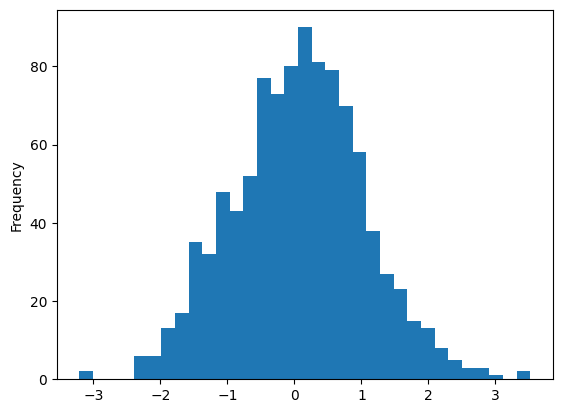

In [69]:
some_series = pd.Series(np.random.normal(size=1000))
some_series.plot(kind='hist', bins=33)

<Axes: ylabel='Frequency'>

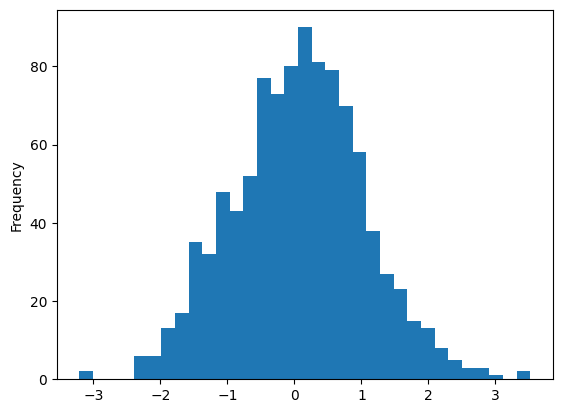

In [70]:
some_series.plot.hist(bins=33)

## - [операции с pd.DataFrame](https://pandas.pydata.org/docs/reference/frame.html)

API: pd.DataFrame.X

- `groupby`
- iterrows - забудьте про это
- [rolling](https://pandas.pydata.org/docs/user_guide/window.html) - скользящие окна
- query - симпатичный способ общаться с датафреймом
- corr - построить матрицу корреляций признаков
- drop - выкинуть какие-то столбцы / строки
- drop_duplicates
- reset_index - сбросить индекс к RangeIndex(0, N)
- sort_values - отсортировать по столбцу
- merge - `Merge with a database-style join`. Не используйте `pd.DataFrame.join`!
- sample
- assign - присвоить новые столбцы и вернуть результат как новый датафрейм
- to_csv, to_parquet - сохранить датафрейм


### Группировка данных

[Документация](https://pandas.pydata.org/docs/user_guide/groupby.html)

![groupby](https://data.bioml.ru/htdocs/courses/python/datasci/pandas/img/groupby.jpg)

In [71]:
display(df.head(3))
df.Pclass.value_counts()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_col_1,new_col_2,new_col_3
id_0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,112,0,484.0
id_1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,112,0,1444.0
id_2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,112,1,676.0


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Группировок есть очень много, на все случаи жизни!

In [72]:
# SeriesGroupBy object
(
    df
    .groupby('Pclass', observed=False)['Age']  # SeriesGroupBy object
    .apply(np.mean)  # Function application
)

Pclass
1    37.784352
2    30.183859
3    27.871527
Name: Age, dtype: float64

In [73]:
# SeriesGroupBy object
(
    df
    .groupby('Pclass', observed=False)['Age']  # SeriesGroupBy object
    .transform(lambda x: x.mean())  # Function application
)

id_0      27.871527
id_1      37.784352
id_2      27.871527
id_3      37.784352
id_4      27.871527
            ...    
id_886    30.183859
id_887    37.784352
id_888    27.871527
id_889    37.784352
id_890    27.871527
Name: Age, Length: 891, dtype: float64

In [74]:
def fun(**kwargs):
    print(kwargs)

fun(a=10, b=20)

{'a': 10, 'b': 20}


In [75]:

# # DataFrameGroupBy object
(
    df
    .groupby('Pclass', observed=False)  # DataFrameGroupBy object
    .agg(
        # Function application with NamedAgg
        mean_age=pd.NamedAgg(column='Age', aggfunc='mean'),
        median_fare=pd.NamedAgg(column='Fare', aggfunc=lambda x: x.median())
    )
    .reset_index()
)

,Pclass,mean_age,median_fare
0,1,37.784352,60.2875
1,2,30.183859,14.2500
2,3,27.871527,8.0500


[**Документация**](https://pandas.pydata.org/docs/reference/groupby.html)

Доступные варианты функций:
- `apply` - применяет функцию
- `agg` - применяет одну или сразу несколько агрегирующих функций
- `transform` - преобразует значения в группах
- `filter` - фильтрует группы по условию
- `pipe` - редкость

### [General functions](https://pandas.pydata.org/docs/reference/general_functions.html)

API: pd.X

- cut, qcut - нарезать числовой признак на бины
- concat - поставить датафреймы друг на друга или рядом друг с другом
- get_dummies - One-Hot Encoding
- to_numeric, to_datetime - перевести в числовой формат / в формат datetime64
- date_range - интервал дат с заданной периодичностью / размером
- read_sql / to_sql - считать/записать датафрейм из/в СУБД
- read_csv / to_csv
- `read_parquet` / `to_parquet`
    - датафреймы сохраняются/считываются как удобный для пандаса сжатый бинарник, который помнит типы данных (csv - не помнит)
    - очень быстро! на порядки быстрее read_csv / to_csv
    - не поддерживает некоторые "типы" (всякий мусор запаркетить не получится :)

In [76]:
t = pd.DataFrame({'some_lists': [[1], [1,2], None, 'sadasd', 1]})
t

,some_lists
0,[1]
1,"[1, 2]"
2,None
3,sadasd
4,1


In [77]:
# t.to_parquet('tmp.parquet')
# pd.read_parquet('tmp.parquet')

## - [*Style](https://pandas.pydata.org/docs/user_guide/style.html)

In [78]:
df.drop(columns='new_col_3').head(20).style.background_gradient()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_col_1,new_col_2
id_0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S,112,0
id_1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C,112,0
id_2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S,112,1
id_3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S,112,1
id_4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S,112,0
id_5,6,0,3,"Moran, Mr. James",male,35.000000,0,0,330877,8.458300,nan,Q,112,1
id_6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,E46,S,112,0
id_7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.075000,nan,S,112,0
id_8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.133300,nan,S,112,1
id_9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.070800,nan,C,112,0


# Matplotlib

In [79]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
print(mpl.__name__, mpl.__version__)
print(sns.__name__, sns.__version__)

matplotlib 3.10.6
seaborn 0.13.2


In [81]:
ttn_global = pd.read_csv('titanic_train.csv')
ttn_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### main

Туториал https://matplotlib.org/stable/tutorials/

- fig, ax и pyplot интерфейсы
- `plt.subplots` и `plt.subplot_mosaic`

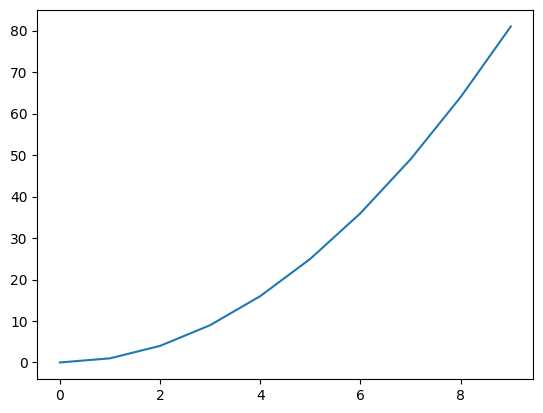

In [82]:
plt.plot(np.arange(10) ** 2)
plt.show()

или

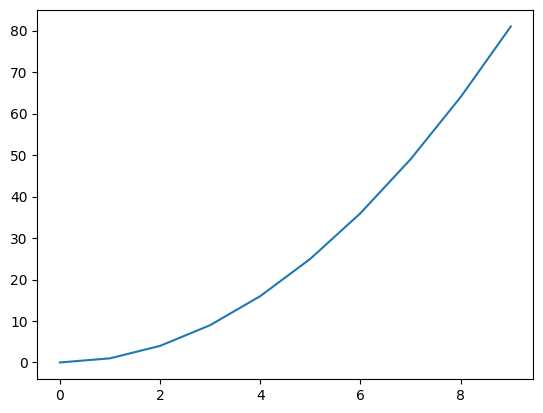

In [83]:
fig, ax = plt.subplots()
ax.plot(np.arange(10) ** 2)
plt.show()

`plt.subplots` и `plt.subplot_mosaic` - два основных способа создать "пустой мольберт" с фиксированной структурой

- `plt.subplots`

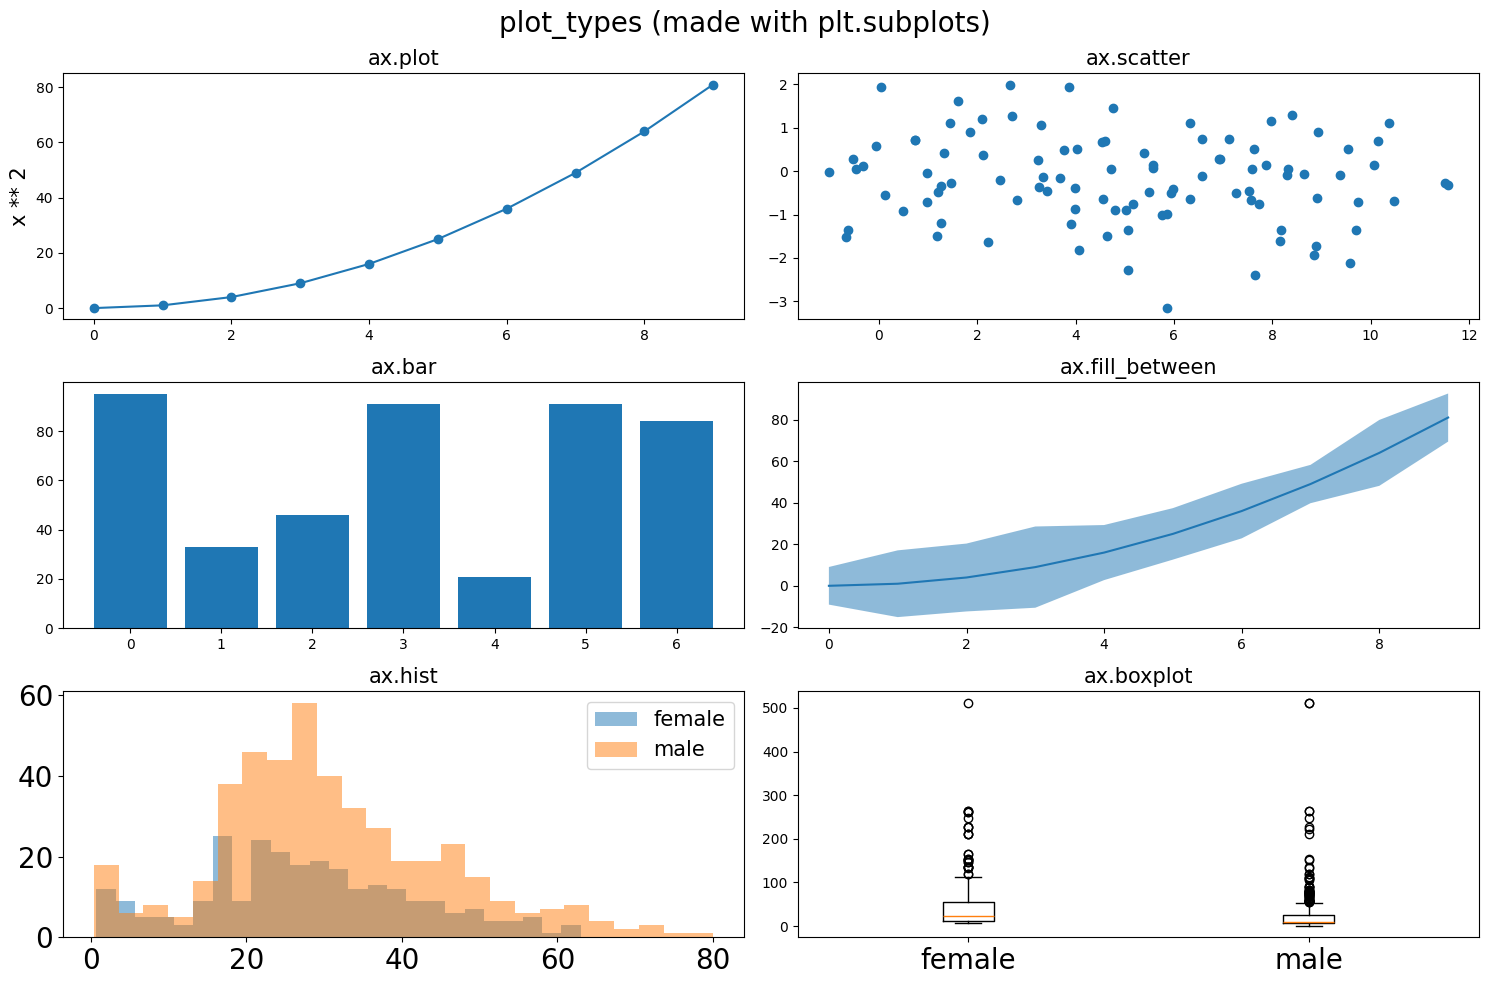

In [84]:
n = 100
array_for_lines = np.arange(10) ** 2
std_for_lines = np.random.randint(10, 40) + 3 * np.random.normal(size=10)
data_for_scatter = np.random.randint(low=0, high=11, size=n) + np.random.normal(size=n), np.random.normal(size=n)
data_for_bar = np.arange(7), np.random.randint(low=10, high=100, size=7)

fig, ax = plt.subplots(3, 2)
ax[0, 0].plot(array_for_lines, marker='o')
ax[0, 0].set_title('ax.plot', fontsize=15)
ax[0, 0].set_ylabel('x ** 2', fontsize=15)


ax[0, 1].scatter(*data_for_scatter)
ax[0, 1].set_title('ax.scatter', fontsize=15)

ax[1, 0].bar(*data_for_bar)
ax[1, 0].set_title('ax.bar', fontsize=15)

ax[1, 1].plot(array_for_lines)
ax[1, 1].fill_between(np.arange(10), y1=array_for_lines + std_for_lines, y2=array_for_lines - std_for_lines, alpha=0.5)
ax[1, 1].set_title('ax.fill_between', fontsize=15)

ax[2, 0].hist(ttn_global[ttn_global.Sex == 'female'].Age, bins=25, alpha=0.5, label='female')
ax[2, 0].hist(ttn_global[ttn_global.Sex == 'male'].Age, bins=25, alpha=0.5, label='male')
ax[2, 0].set_title('ax.hist', fontsize=15)
ax[2, 0].legend(fontsize=15)
ax[2, 0].tick_params(axis='both', labelsize=20)

data_for_boxplot = [ttn_global[ttn_global.Sex == 'female'].Fare.dropna(),
                    ttn_global[ttn_global.Sex == 'male'].Fare.dropna()]
ax[2, 1].boxplot(data_for_boxplot, tick_labels=['female', 'male'])
ax[2, 1].set_title('ax.boxplot', fontsize=15)
ax[2, 1].tick_params(axis='x', labelsize=20)

fig.suptitle('plot_types (made with plt.subplots)', fontsize=20)
fig.set_size_inches(15, 10)
fig.tight_layout()

plt.show()

- `plt.subplot_mosaic`

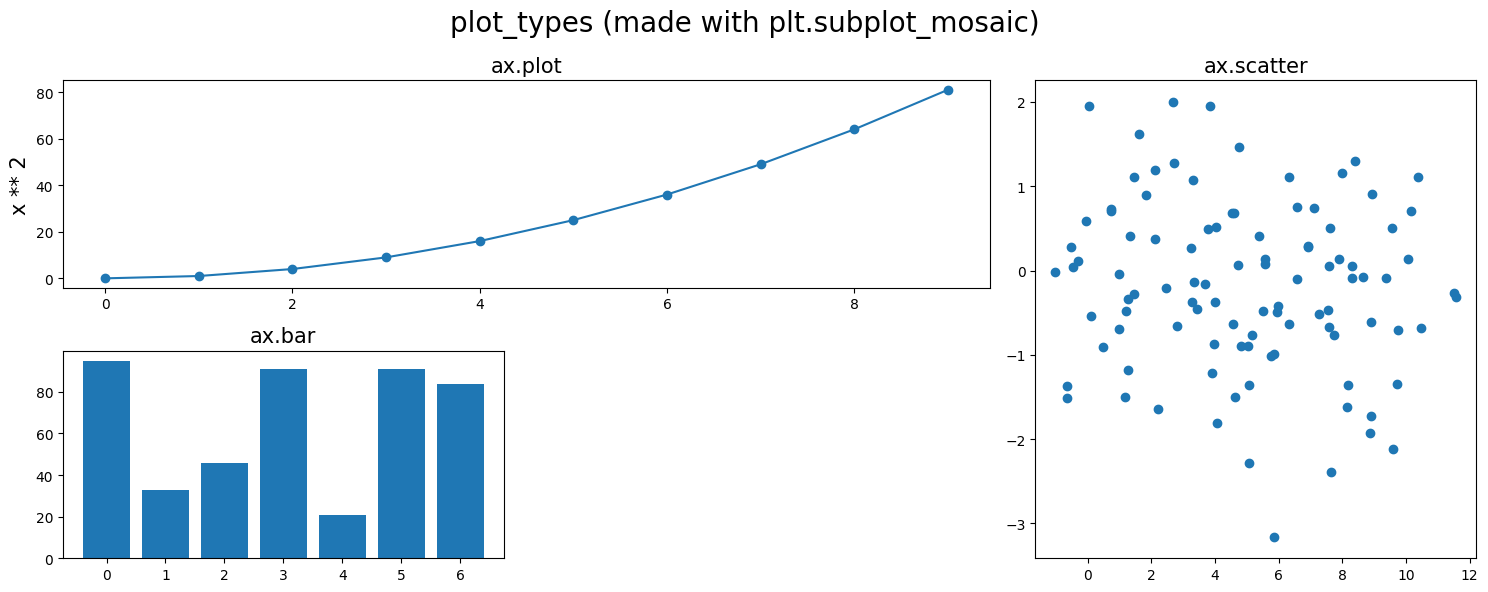

In [85]:
mosaic = [
['plot', 'plot', 'scatter'],
['bar', '.', 'scatter'],
]
fig, ax = plt.subplot_mosaic(mosaic=mosaic)

ax['plot'].plot(array_for_lines, marker='o')
ax['plot'].set_title('ax.plot', fontsize=15)
ax['plot'].set_ylabel('x ** 2', fontsize=15)


ax['scatter'].scatter(*data_for_scatter)
ax['scatter'].set_title('ax.scatter', fontsize=15)

ax['bar'].bar(*data_for_bar)
ax['bar'].set_title('ax.bar', fontsize=15)

fig.suptitle('plot_types (made with plt.subplot_mosaic)', fontsize=20)
fig.set_size_inches(15, 6)
fig.tight_layout()

plt.show()

Пара слов о `pyplot`:

`pyplot` умеет рисовать только в "текущие" `fig`, `ax` (`plt.gcf()`, `plt.gca()` - get current figure, get current axes).
Переключать "текущие" `fig`, `ax` с одних на другие можно с помощью `plt.subplot` (не путать с `plt.subplots`!).

matplotlib также умеет выводить картинки, добавлять текстовые аннотации, строить 3d-графики...

### [*colors](https://matplotlib.org/stable/users/explain/colors/colors.html#sphx-glr-users-explain-colors-colors-py)

посмотрим, как задаются цвета для аргумента `color=`

### [*colormaps](https://matplotlib.org/stable/api/cm_api.html)
цветовые схемы для аргумента `cmap=`

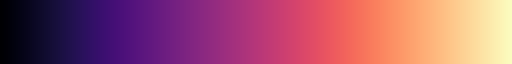

None


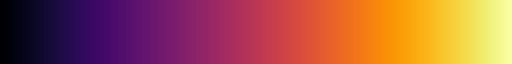

None


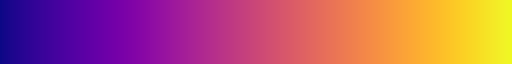

None


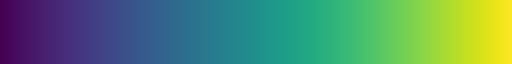

None


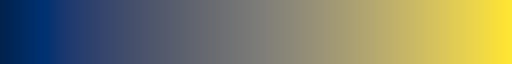

None


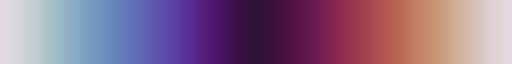

None


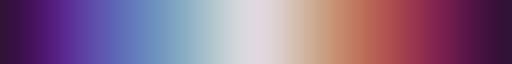

None


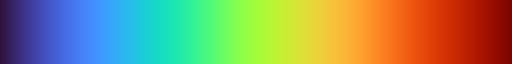

None


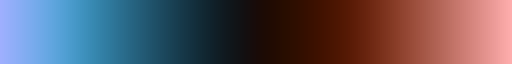

None


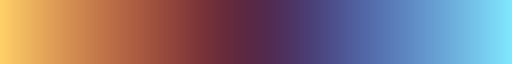

None


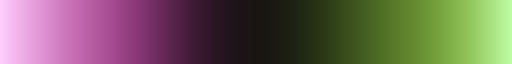

None


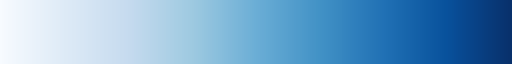

None


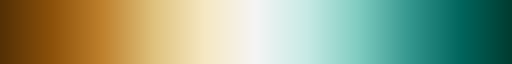

None


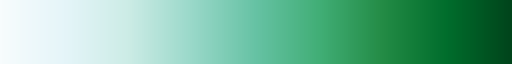

None


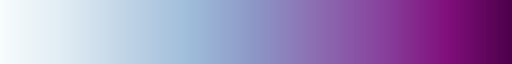

None


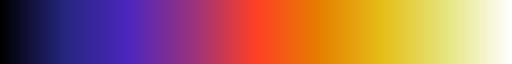

None


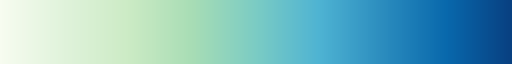

None


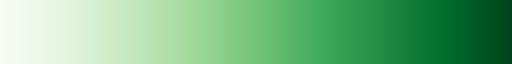

None


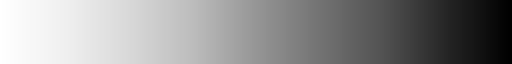

None


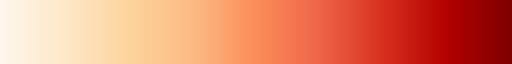

None


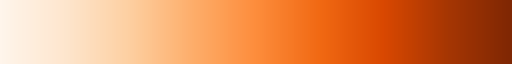

None


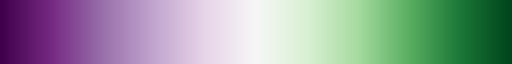

None


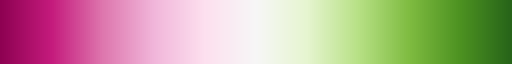

None


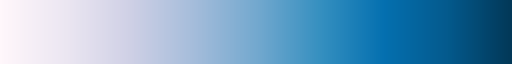

None


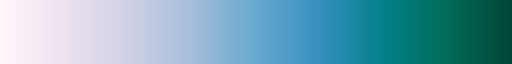

None


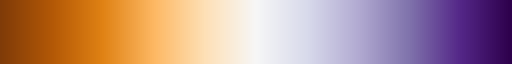

None


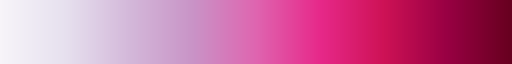

None


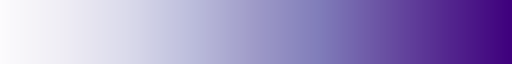

None


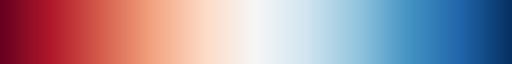

None


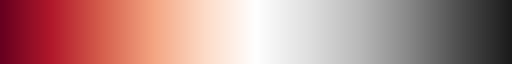

None


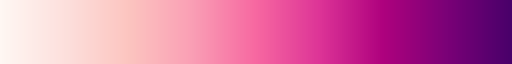

None


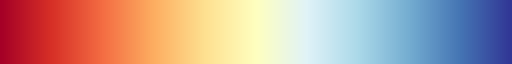

None


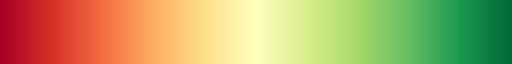

None


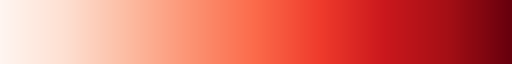

None


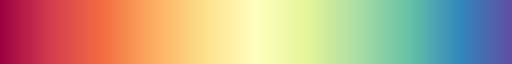

None


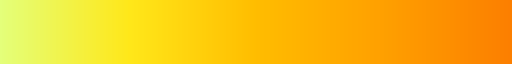

None


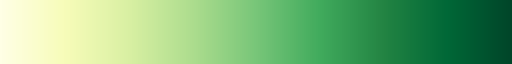

None


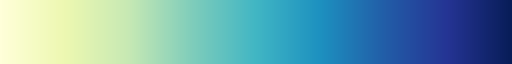

None


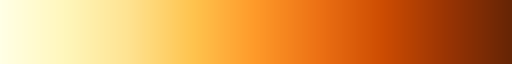

None


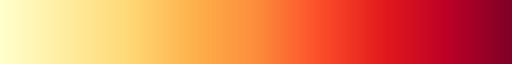

None


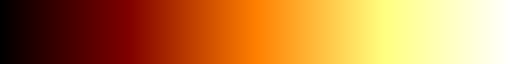

None


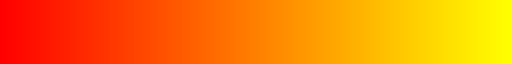

None


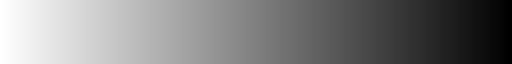

None


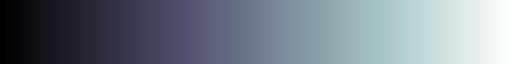

None


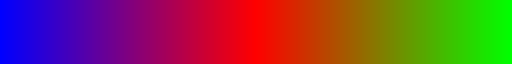

None


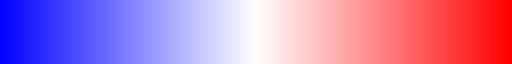

None


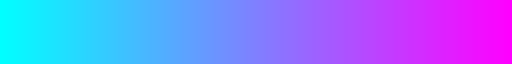

None


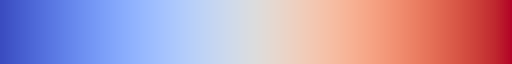

None


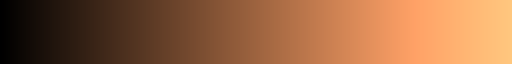

None


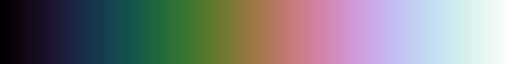

None


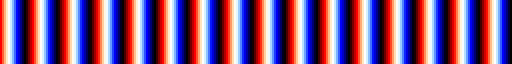

None


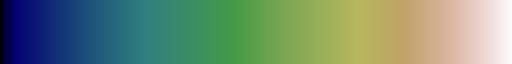

None


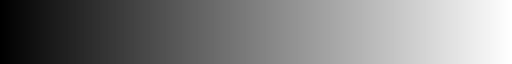

None


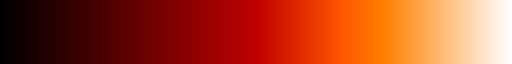

None


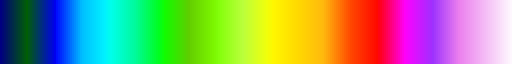

None


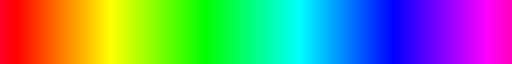

None


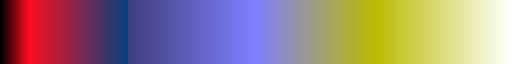

None


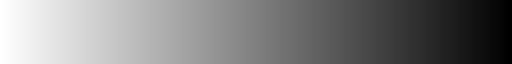

None


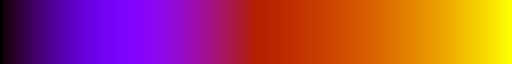

None


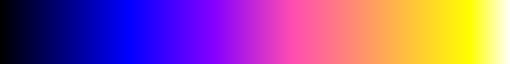

None


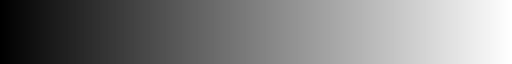

None


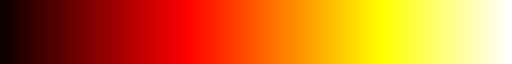

None


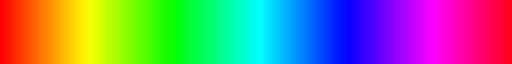

None


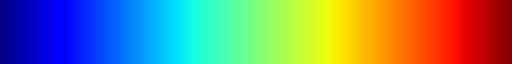

None


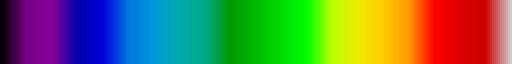

None


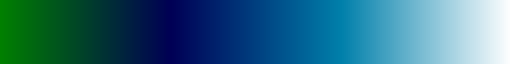

None


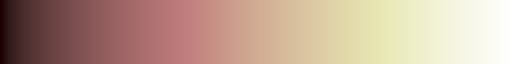

None


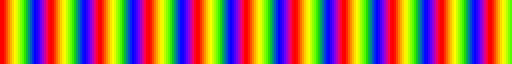

None


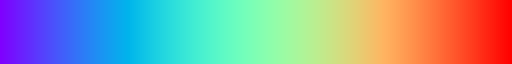

None


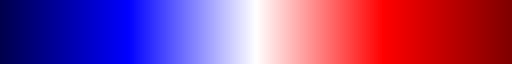

None


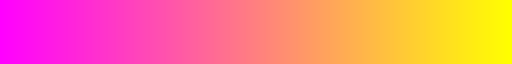

None


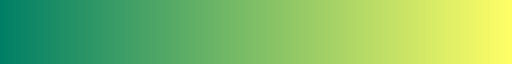

None


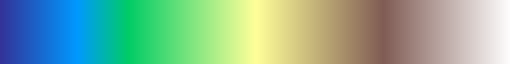

None


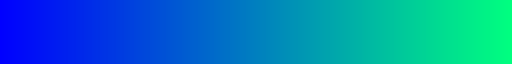

None


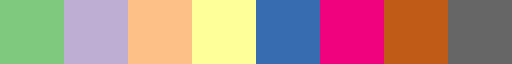

None


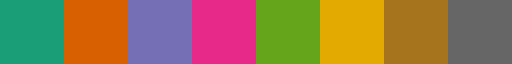

None


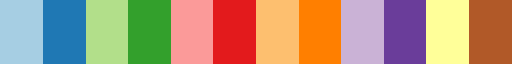

None


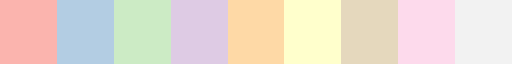

None


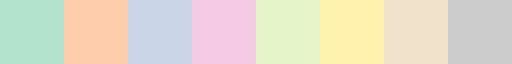

None


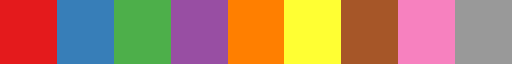

None


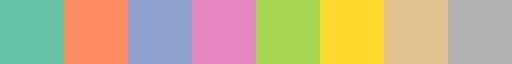

None


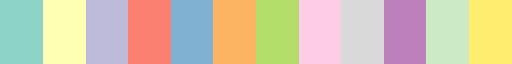

None


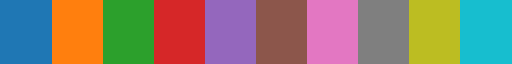

None


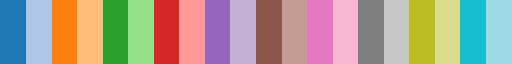

None


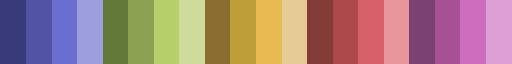

None


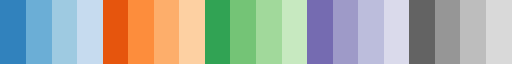

None


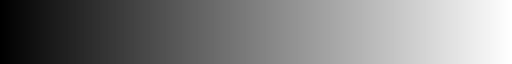

None


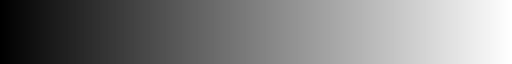

None


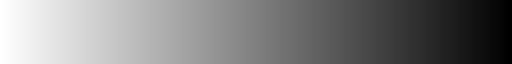

None


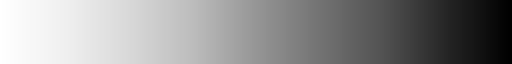

None


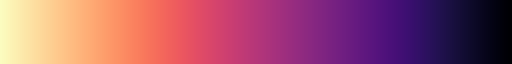

None


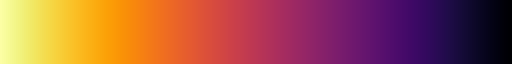

None


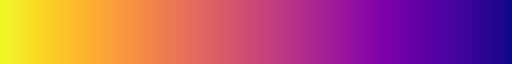

None


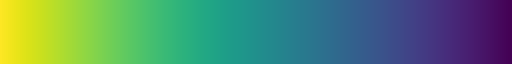

None


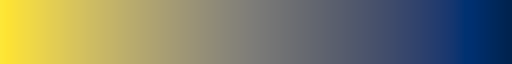

None


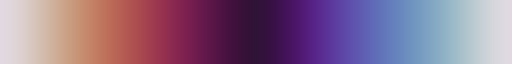

None


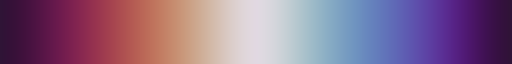

None


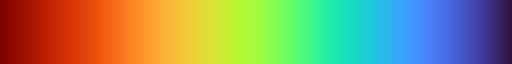

None


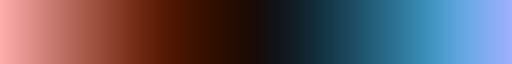

None


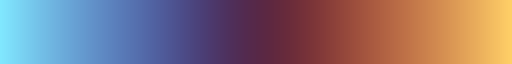

None


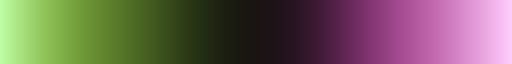

None


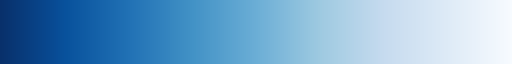

None


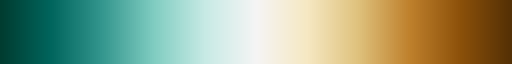

None


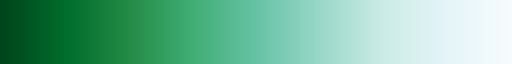

None


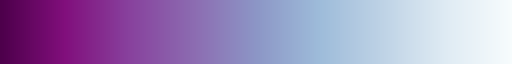

None


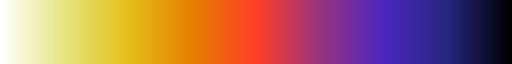

None


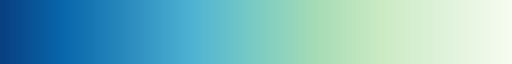

None


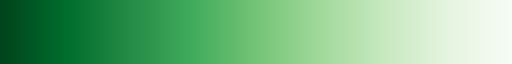

None


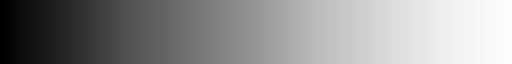

None


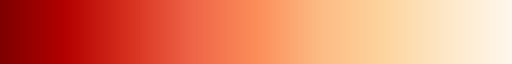

None


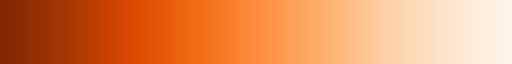

None


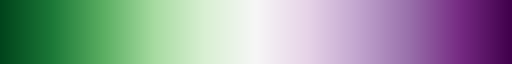

None


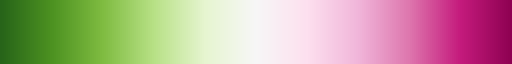

None


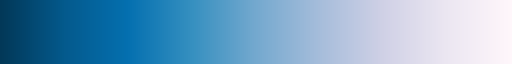

None


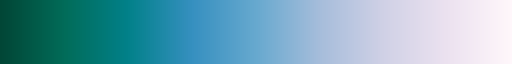

None


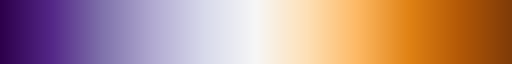

None


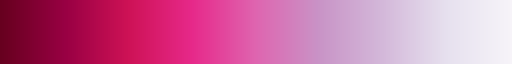

None


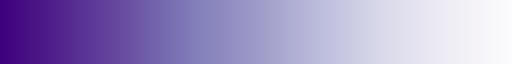

None


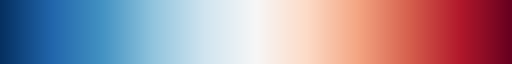

None


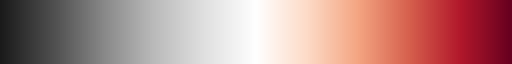

None


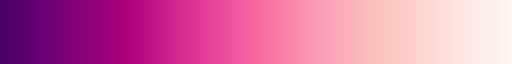

None


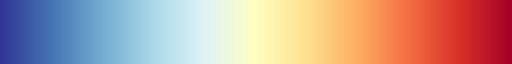

None


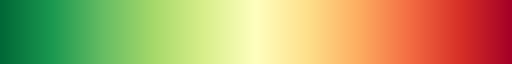

None


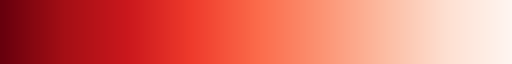

None


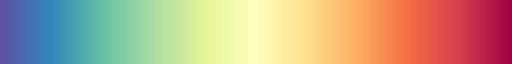

None


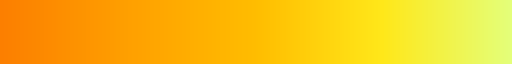

None


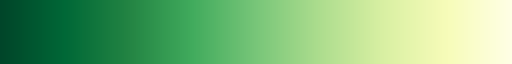

None


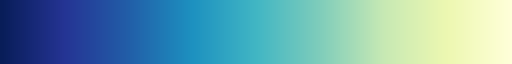

None


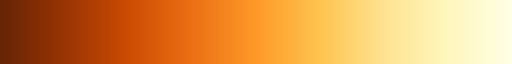

None


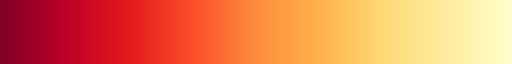

None


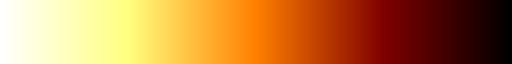

None


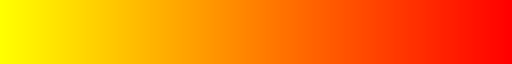

None


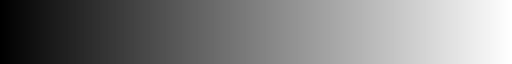

None


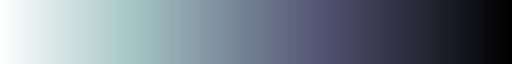

None


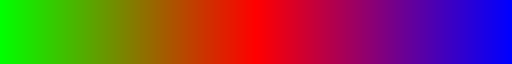

None


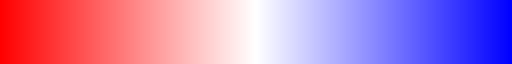

None


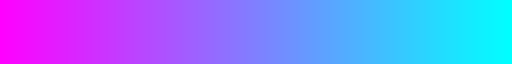

None


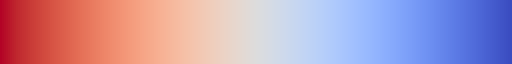

None


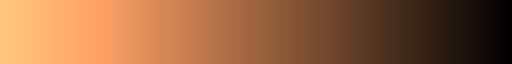

None


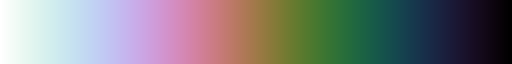

None


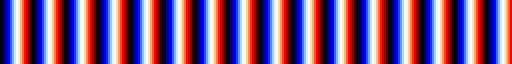

None


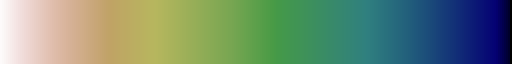

None


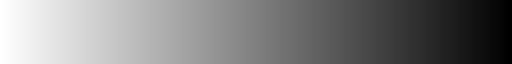

None


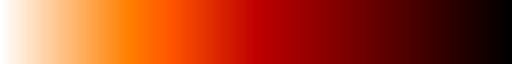

None


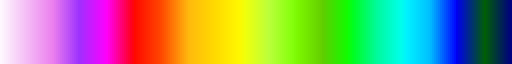

None


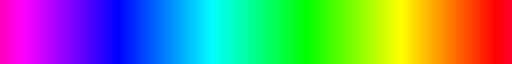

None


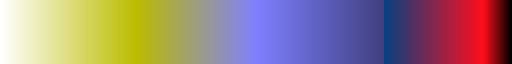

None


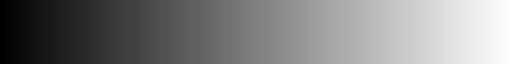

None


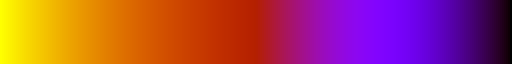

None


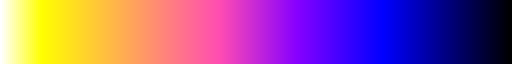

None


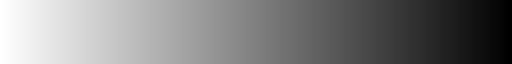

None


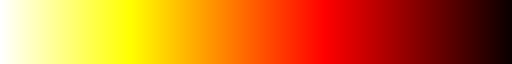

None


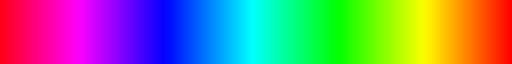

None


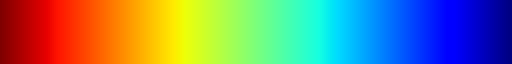

None


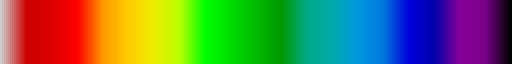

None


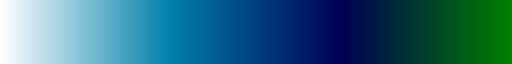

None


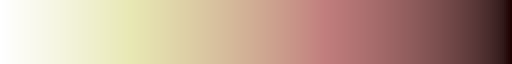

None


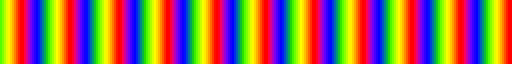

None


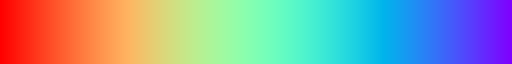

None


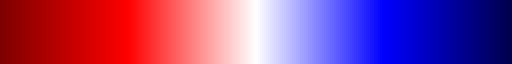

None


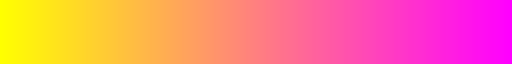

None


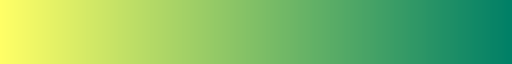

None


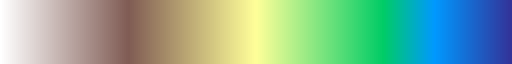

None


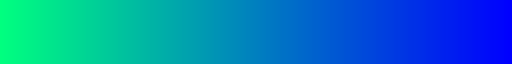

None


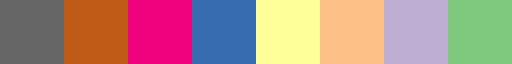

None


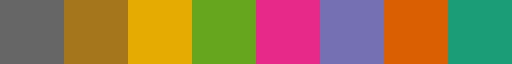

None


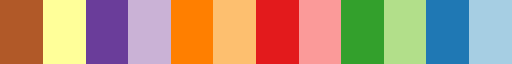

None


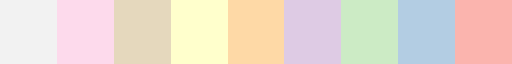

None


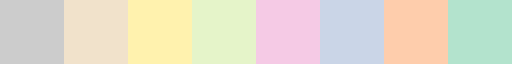

None


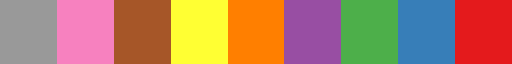

None


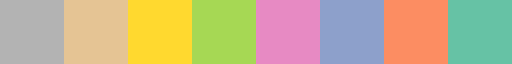

None


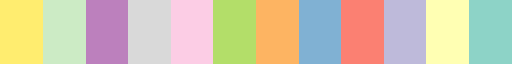

None


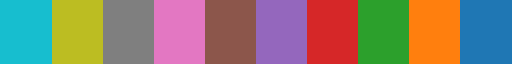

None


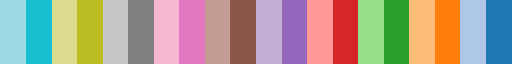

None


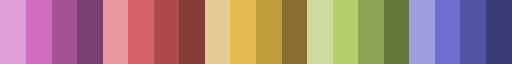

None


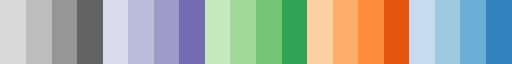

None


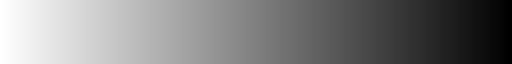

None


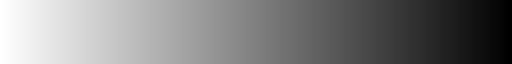

None


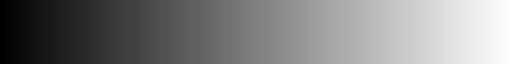

None


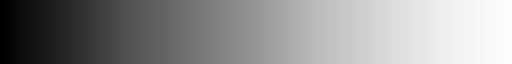

None


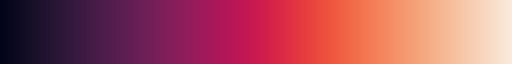

None


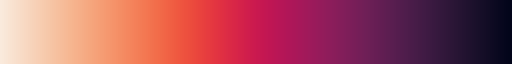

None


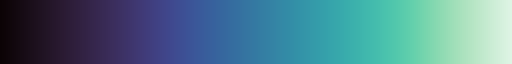

None


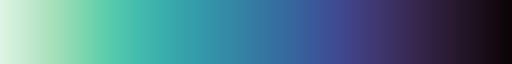

None


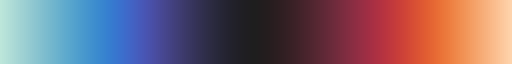

None


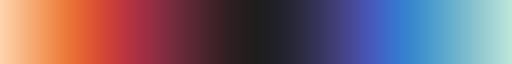

None


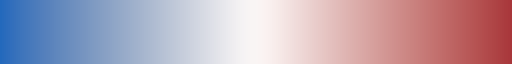

None


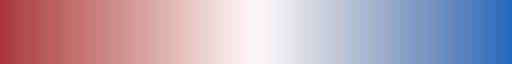

None


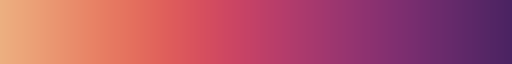

None


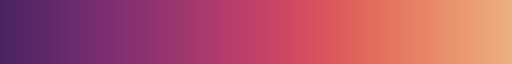

None


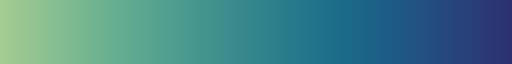

None


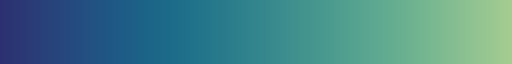

None


In [86]:
from matplotlib import colormaps
from IPython.display import display

for cm in colormaps:
    print(display(colormaps[cm]))

### [*rcParams](https://matplotlib.org/stable/users/explain/customizing.html) - глобальные настройки matplotlib

In [87]:
import matplotlib as mpl

mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

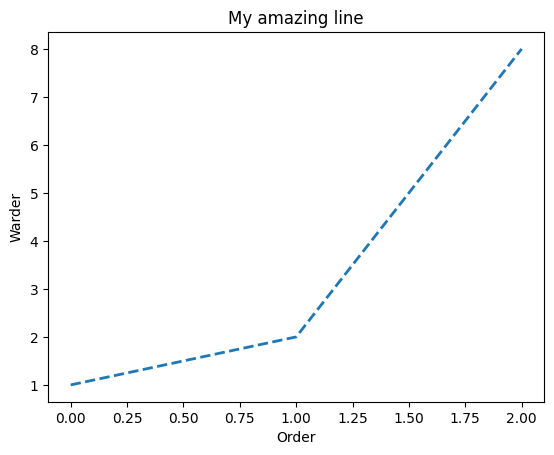

In [88]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'

plt.plot([1, 2, 8])
plt.title('My amazing line')
plt.xlabel('Order')
plt.ylabel('Warder')
plt.show()

In [89]:
SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE, labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)
plt.rc('axes.spines', top=False)
plt.rc('axes.spines', right=False)

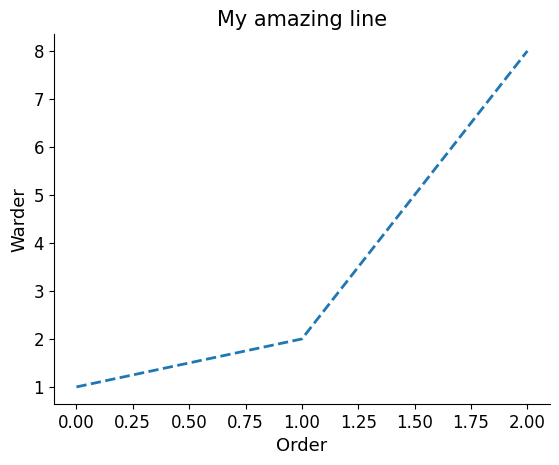

In [90]:
plt.plot([1, 2, 8])
plt.title('My amazing line')
plt.xlabel('Order')
plt.ylabel('Warder')
plt.show()

In [91]:
plt.rcdefaults()

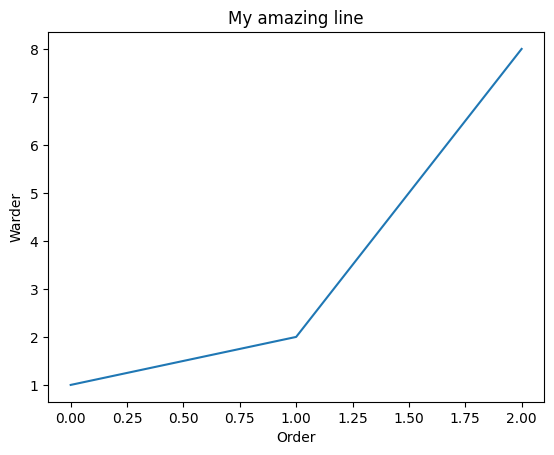

In [92]:
plt.plot([1, 2, 8])
plt.title('My amazing line')
plt.xlabel('Order')
plt.ylabel('Warder')
plt.show()

### *twin axes - разные единицы измерения на одном графике

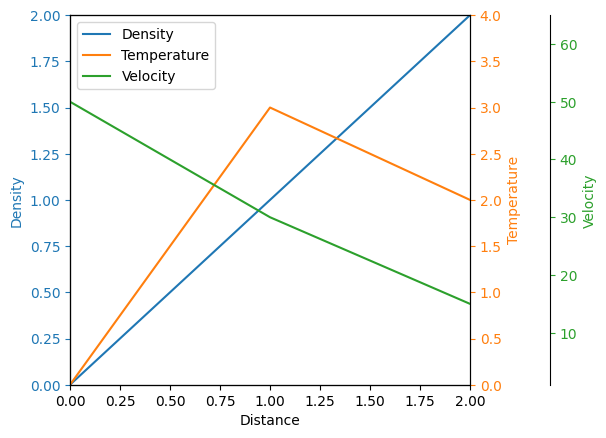

In [93]:
# пример из доки
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot([0, 1, 2], [0, 1, 2], "C0", label="Density")
p2, = twin1.plot([0, 1, 2], [0, 3, 2], "C1", label="Temperature")
p3, = twin2.plot([0, 1, 2], [50, 30, 15], "C2", label="Velocity")

ax.set(xlim=(0, 2), ylim=(0, 2), xlabel="Distance", ylabel="Density")
twin1.set(ylim=(0, 4), ylabel="Temperature")
twin2.set(ylim=(1, 65), ylabel="Velocity")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

ax.tick_params(axis='y', colors=p1.get_color())
twin1.tick_params(axis='y', colors=p2.get_color())
twin2.tick_params(axis='y', colors=p3.get_color())

ax.legend(handles=[p1, p2, p3])

plt.show()

# Seaborn intro

Туториал https://seaborn.pydata.org/tutorial.html

  seaborn работает поверх matplotlib, дружит с pandas. Есть два интерфейса общения с библиотекой - отрисовка функциями и объектный интерфейс. Рассмотрим в рамках семинара функциональный интерфейс.

In [94]:
import warnings
warnings.filterwarnings('ignore')

### Relational plots

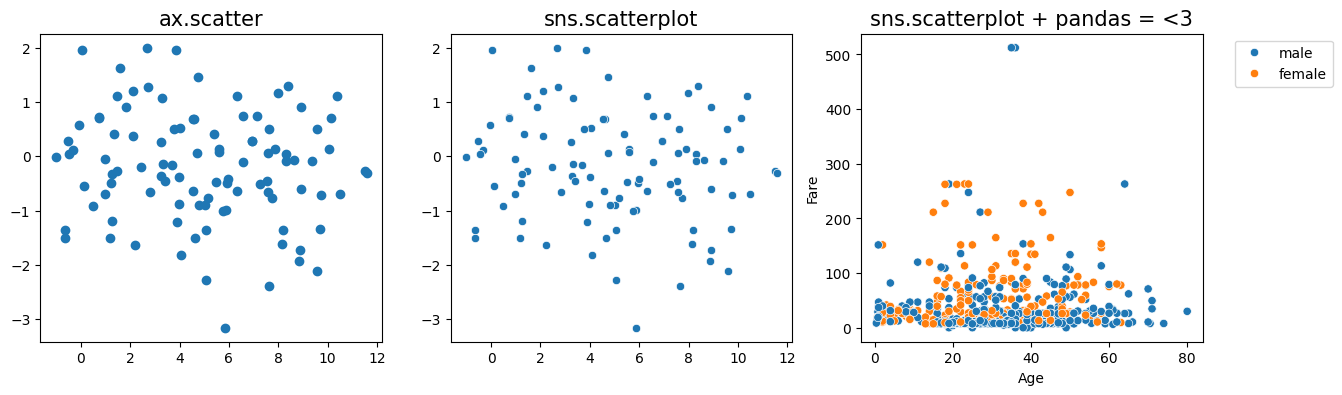

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1028)>

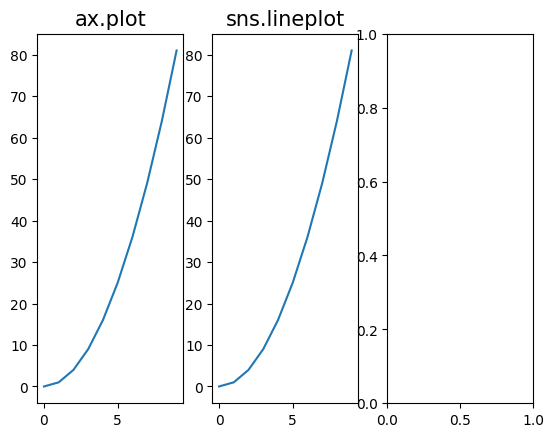

In [110]:
# scatterplot

fig, ax = plt.subplot_mosaic('abc')
ax['a'].scatter(*data_for_scatter)
ax['a'].set_title('ax.scatter', fontsize=15)

sns.scatterplot(x=data_for_scatter[0], y=data_for_scatter[1], ax=ax['b'])
ax['b'].set_title('sns.scatterplot', fontsize=15)

plot = sns.scatterplot(data=ttn_global, x='Age', y='Fare', hue='Sex', ax=ax['c'])
plot.legend(bbox_to_anchor=(1.4, 1)) # подвинуть легенду: по оси Х на 40% правее гранциы, по оси Y оставить на верхней границе
ax['c'].set_title('sns.scatterplot + pandas = <3', fontsize=15)

fig.set_size_inches(15, 4)

plt.show()

# lineplot

fig, ax = plt.subplot_mosaic('abc')
ax['a'].plot(array_for_lines)
ax['a'].set_title('ax.plot', fontsize=15)

sns.lineplot(x=np.arange(10), y=array_for_lines, ax=ax['b'], n_boot=0, errorbar=None)
ax['b'].set_title('sns.lineplot', fontsize=15)

data_dots = sns.load_dataset('dots')
sns.lineplot(data=data_dots, x='time', y='firing_rate',
            hue='align', ax=ax['c'], n_boot=0, errorbar=None)
ax['c'].set_title('sns.lineplot + pandas = <3', fontsize=15)
ax['c'].tick_params(axis='both', labelsize=15)
ax['c'].legend(fontsize=15)

fig.set_size_inches(15, 5)

plt.show()

In [96]:
data_dots.head()

NameError: name 'data_dots' is not defined

In [98]:
facetGrid = sns.relplot(
    data=data_dots, x='time', y='firing_rate',
    hue='coherence', errorbar=None,
    kind='line', col='align',
)

# cur_ax = facetGrid.axes[0, 0]
# cur_ax.set_title(cur_ax.get_title(), fontsize=15)
# cur_ax = facetGrid.axes[0, 1]
# cur_ax.set_title(cur_ax.get_title(), fontsize=15)

plt.gcf().suptitle('sns.relplot', fontsize=15)
plt.gcf().set_size_inches(12, 6)

NameError: name 'data_dots' is not defined

- ### Distribution plots

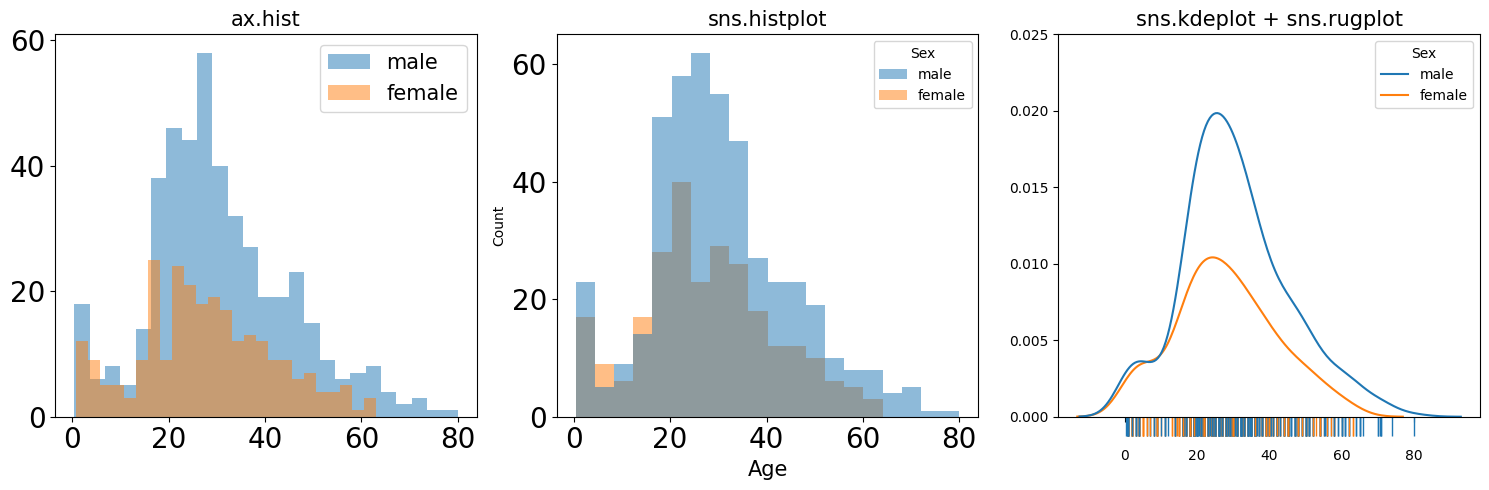

In [108]:
fig, ax = plt.subplot_mosaic('abc')
ax['a'].hist(ttn_global[ttn_global.Sex == 'male'].Age, bins=25, alpha=0.5, label='male')
ax['a'].hist(ttn_global[ttn_global.Sex == 'female'].Age, bins=25, alpha=0.5, label='female')
ax['a'].set_title('ax.hist', fontsize=15)
ax['a'].legend(fontsize=15)
ax['a'].tick_params(axis='both', labelsize=20)

sns.histplot(data=ttn_global, x='Age', hue='Sex', linewidth=0, alpha=0.5, ax=ax['b'])
ax['b'].set_title('sns.histplot', fontsize=15)
ax['b'].tick_params(axis='both', labelsize=20)
ax['b'].set_xlabel(ax['b'].get_xlabel(), fontsize=15)

sns.kdeplot(data=ttn_global, x='Age', hue='Sex', ax=ax['c'])
sns.rugplot(data=ttn_global, x='Age', hue='Sex', ax=ax['c'], height=-0.05, clip_on=False)
ax['c'].set_title('sns.kdeplot + sns.rugplot', fontsize=15)
ax['c'].tick_params(axis='x', pad=20)
ax['c'].set_xlabel('')
ax['c'].set_ylabel('')
ax['c'].set_ylim(0, 0.025)

fig.set_size_inches(15, 5)
fig.tight_layout()

plt.show()

- ### Categorical plots

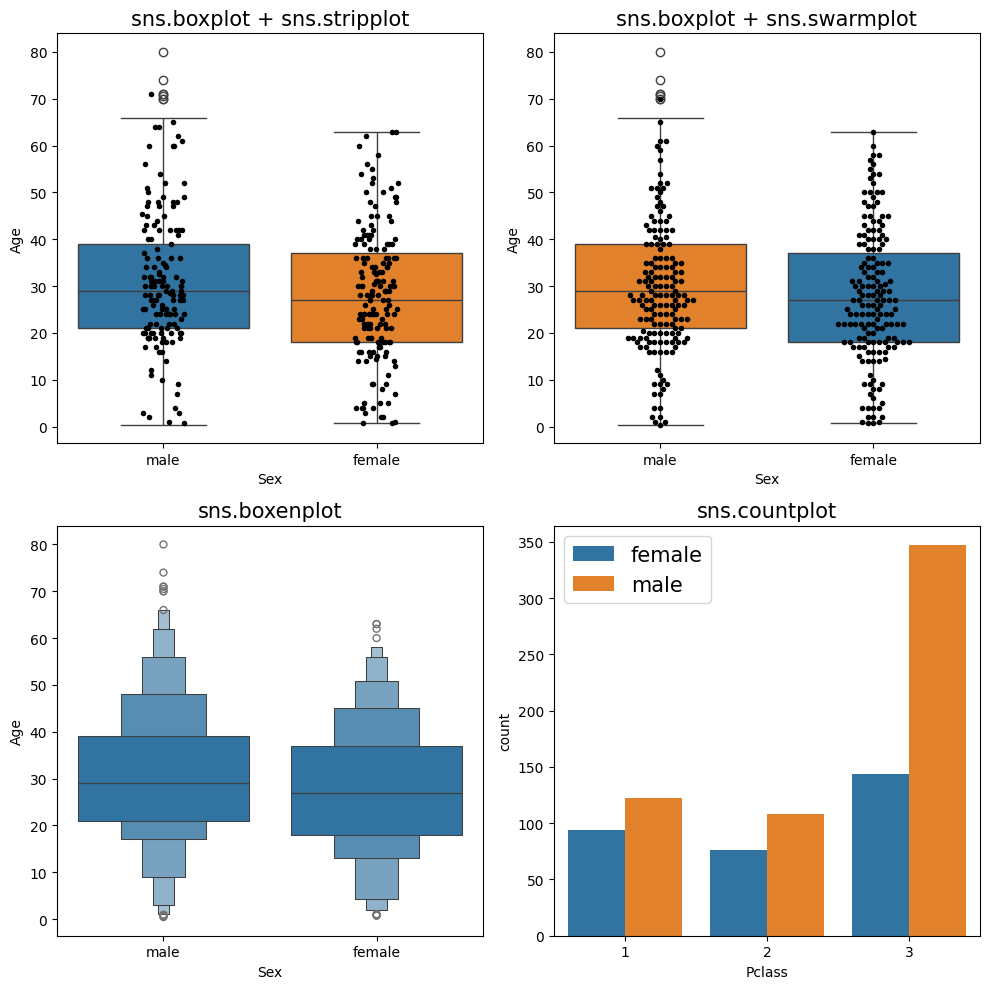

In [107]:
mosaic = [['a', 'b'], ['c', 'd']]

fig, ax = plt.subplot_mosaic(mosaic)
sns.boxplot(data=ttn_global, y='Age', x='Sex', hue='Sex', ax=ax['a'])
sns.stripplot(data=ttn_global.groupby('Sex').sample(200), y='Age', x='Sex', ax=ax['a'], color='black', size=4)
ax['a'].set_title('sns.boxplot + sns.stripplot', fontsize=15)
ax['a'].tick_params(axis='both', labelsize=10)
ax['a'].set_xlabel(ax['a'].get_xlabel(), fontsize=10)
ax['a'].set_ylabel(ax['a'].get_ylabel(), fontsize=10)

sns.boxplot(data=ttn_global, y='Age', x='Sex', hue='Sex', hue_order=['female', 'male'], ax=ax['b'])  # изменен порядок покраски - hue_order
sns.swarmplot(data=ttn_global.groupby('Sex').sample(200), y='Age', x='Sex', ax=ax['b'], color='black', size=4)
ax['b'].set_title('sns.boxplot + sns.swarmplot', fontsize=15)


sns.boxenplot(data=ttn_global, y='Age', x='Sex', ax=ax['c'])
ax['c'].set_title('sns.boxenplot', fontsize=15)

sns.countplot(data=ttn_global, x='Pclass', hue='Sex', ax=ax['d'], legend='brief')
ax['d'].set_title('sns.countplot', fontsize=15)
ax['d'].legend(fontsize=15)

fig.set_size_inches(10, 10)
fig.tight_layout()

plt.show()

### Тепловые карты (Heatmaps)

In [99]:
correlations = ttn_global.select_dtypes(np.number).corr()
correlations

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

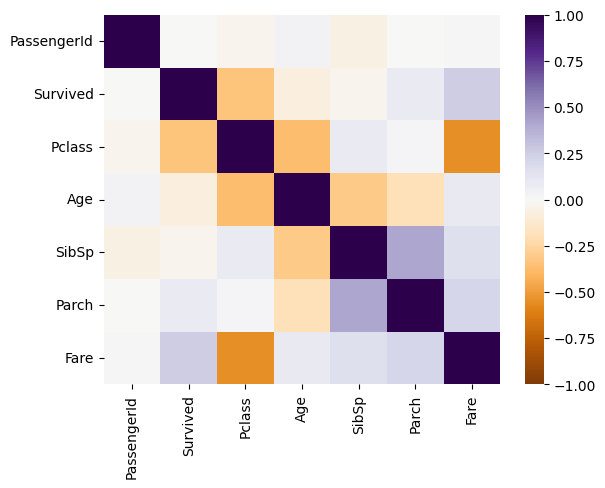

In [100]:
sns.heatmap(correlations, center=0, cmap='PuOr', vmin=-1, vmax=1) # используйте diverging colormaps для corr-heatmaps

### Время построения графиков в зависимости от размера выборки

In [ ]:
from sklearn.datasets import make_blobs

df, _ = make_blobs(n_samples=int(3e6), n_features=2)
df = pd.DataFrame(df, columns=['feature_1', 'feature_2'])
df['time'] = np.arange(df.shape[0])
df['cat_feature'] = np.random.randint(0, 8, df.shape[0])
df['target'] = np.random.randint(0, 2, df.shape[0])

df.head()

In [ ]:
from functools import partial
from time import time as tm
from collections import defaultdict

mpl.rcParams['agg.path.chunksize'] = 10000

import warnings
warnings.filterwarnings('ignore')

sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]
plot_list = [
             partial(sns.histplot, x='feature_1'),
             partial(sns.histplot, x='feature_1', kde=True),
             partial(sns.kdeplot, x='feature_1'),
             partial(sns.rugplot, x='feature_1'),
             partial(sns.swarmplot, x='feature_1', hue='target'),
             partial(sns.stripplot, x='feature_1', hue='target'),
             partial(sns.boxplot, x='feature_1', hue='target'),
             partial(sns.boxenplot, x='feature_1', hue='target')
]
plot_names = [
             'sns.histplot',
             'sns.histplot + kde',
             'sns.kdeplot',
             'sns.rugplot',
             'sns.swarmplot',
             'sns.stripplot',
             'sns.boxplot',
             'sns.boxenplot',
]
plots = zip(plot_names, plot_list)
grp = df.groupby('target')

res = defaultdict(list)
std = defaultdict(list)
limits = defaultdict(lambda:100)
limits['sns.swarmplot'] = 5

for name, plot in plots:
    print(name)
    fig, ax = plt.subplots(1, 3)
    for ax_num, size in enumerate(sizes[:limits[name]]):
        data = grp.sample(size)
        plt.subplot(1, 3, ax_num % 3 + 1)
        plt.gca().set_title(f'size: {size}')
        actual_time = %timeit -n1 -r1 -o -q plot(data=data)
        if ax_num % 3 == 2:
            fig.set_size_inches(9, 3)
            fig.tight_layout()
            plt.show()
            fig, ax = plt.subplots(1, 3)

        # print(name, size, actual_time.average)
        res[name].append(actual_time.average)
        std[name].append(actual_time.stdev)

    fig.set_size_inches(9, 3)
    fig.tight_layout()
    plt.show()
#     print(show_time)

In [ ]:
for i, name in enumerate(res):
    plt.plot(sizes[:limits[name]], res[name], label=name)
#     plt.fill_between(sizes[:limits[name]],
#                      np.array(res[name]) + np.array(std[name]),
#                      np.array(res[name]) - np.array(std[name]),
#                      alpha=.5, linewidth=0)

    plt.xlabel('size', fontsize=15)
    plt.ylabel('seconds', fontsize=15)
    move_names = ('sns.kdeplot', 'sns.histplot')
    modifier = 0 if name not in move_names else -840000

    plt.annotate(name + f' {round(res[name][-1], 3)}', xy=(sizes[:limits[name]][-1] + modifier, res[name][-1]),
                 fontsize=20)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.gcf().set_size_inches(20, 12)
sns.despine()

plt.show()

### Palettes

[Документация](https://seaborn.pydata.org/tutorial/color_palettes.html#)

Цветовые схемы для аргумента `palette=`. Можно стырить из matplotlib или использовать родные/свои. Посмотреть [варианты](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette)

In [101]:
from seaborn import color_palette

color_palette('pastel')


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [102]:
color_palette('pastel', n_colors=30) # повторяются цвета

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353),
 (0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353),
 (0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

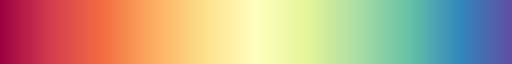

In [103]:
color_palette('Spectral', as_cmap=True) # as_cmap - непрерывная схема

In [104]:
color_palette('Spectral', n_colors=30) # родная палитра - всегда ограниченное кол-во цветов

[(0.6872741253364091, 0.07896962706651288, 0.2748173779315648),
 (0.7549404075355632, 0.15401768550557476, 0.29081122645136487),
 (0.8226066897347175, 0.22906574394463664, 0.30680507497116494),
 (0.8710495963091118, 0.2973471741637831, 0.2959630911188005),
 (0.9091887735486351, 0.3551710880430603, 0.281199538638985),
 (0.9473279507881585, 0.4129950019223375, 0.2664359861591696),
 (0.9651672433679355, 0.48742791234140703, 0.2904267589388696),
 (0.9776239907727797, 0.5773933102652824, 0.33194925028835054),
 (0.9886966551326413, 0.6573625528642827, 0.36885813148788915),
 (0.9930026912725874, 0.7246443675509417, 0.41591695501730086),
 (0.9942329873125721, 0.7861591695501728, 0.46758938869665495),
 (0.9956170703575548, 0.855363321799308, 0.5257208765859285),
 (0.9968473663975395, 0.9022683583237217, 0.5850826605151864),
 (0.998077662437524, 0.9404075355632449, 0.6490580545943867),
 (0.9993079584775086, 0.9785467128027682, 0.7130334486735871),
 (0.9826989619377164, 0.9930795847750865, 0.7220299884659749),
 (0.9519415609381008, 0.9807766243752404, 0.6740484429065745),
 (0.9211841599384853, 0.9684736639753941, 0.6260668973471745),
 (0.874740484429066, 0.9497116493656287, 0.6016147635524798),
 (0.7930795847750868, 0.916493656286044, 0.6182237600922722),
 (0.720492118415994, 0.8869665513264131, 0.6329873125720876),
 (0.6440599769319495, 0.8562860438292965, 0.643521722414456),
 (0.5591695501730105, 0.8230680507497117, 0.6447520184544406),
 (0.46366782006920426, 0.7856978085351788, 0.6461361014994234),
 (0.38400615148019995, 0.7429450211457131, 0.6544405997693196),
 (0.3200307574009996, 0.6715878508266051, 0.6839677047289504),
 (0.2560553633217993, 0.6002306805074971, 0.7134948096885814),
 (0.20622837370242214, 0.5201845444059977, 0.7349480968858132),
 (0.2603613994617455, 0.45005767012687425, 0.7017301038062284),
 (0.31449442522106885, 0.37993079584775086, 0.6685121107266436)]

In [105]:
color_palette([f'C{i}' for i in range(10)])

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [106]:
color_palette('light:C3', n_colors=10)

[(0.9510363732402657, 0.9414422643518318, 0.9413324490764395),
 (0.9387580232989278, 0.8548617527413422, 0.8551945992278309),
 (0.9264796733575899, 0.7682812411308528, 0.7690567493792222),
 (0.9137628109183471, 0.6786085683914173, 0.6798425477503061),
 (0.9014844609770092, 0.5920280567809277, 0.5937046979016974),
 (0.8887675985377663, 0.5023553840414923, 0.5044904962727813),
 (0.8764892485964284, 0.41577487243100275, 0.4183526464241727),
 (0.8637723861571857, 0.3261021996915672, 0.32913844479525656),
 (0.8514940362158477, 0.23952168808107777, 0.24300059494664794),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)]

In [ ]:
color_palette('dark:C4_r', n_colors=10)

In [ ]:
color_palette('blend:white,C3', n_colors=10)

In [ ]:
color_palette('blend:C4,black', n_colors=10)

In [ ]:
color_palette('blend:black,#ffcd00,#fafafa', n_colors=10)